In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# ファイルパスに応じて変更する必要があります
df = pd.read_csv('../data/combined_batches_cleaned_26k_3.csv')
df.head()


,url,url_type,url_len,letters_count,digits_count,special_chars_count,shortened,is_domain_in_url,secure_http,redirect_count,...,has_og_image,has_og_title,has_link_stylesheet,performance_score,FCP,LCP,CLS,TTFB,SpeedIndex,TBT
0,123people.com/c/george+beers,0,28,21,3,4,0,0,0,1,...,False,True,True,0.98,522.000000,642.000000,0.033901,944.0,1374.654466,0.0
1,biographi.ca/009004-119.01-e.php?&id_nbr=8097,0,45,20,15,10,0,0,0,4,...,True,True,True,0.94,822.038853,1046.341351,0.034177,199.0,1866.525789,25.5
2,http://xhamster.com/movies/1515821/bisexual_cu...,0,94,77,7,17,0,1,0,2,...,True,True,True,0.50,1512.414532,5089.235989,0.012295,700.0,2208.209373,399.0
3,nannu.info/music/artists/shreya-ghoshal/,0,40,34,0,6,0,0,0,1,...,False,False,False,0.78,906.283111,1703.476934,0.071229,116.0,2767.985784,214.0
4,en.wikipedia.org/wiki/Walloons,0,30,26,0,4,0,0,0,1,...,True,True,True,0.96,504.000000,1032.000000,0.000892,355.0,1758.528203,11.5


In [3]:

# 不要な列の削除（urlなど文字列データ）
df = df.drop(columns=['url'])

# ブール値をint型に変換
df = df.astype({col: int for col in df.select_dtypes('bool').columns})

# 欠損値確認と処理（今回は簡略化のため0埋め）
df.fillna(0, inplace=True)

# 特徴量とラベルの分離
X = df.drop(columns=['url_type'])
y = df['url_type']

# 学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:

# モデルの作成と学習
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      5102
           1       0.89      0.99      0.94      5328
           2       0.79      0.71      0.75      5170

    accuracy                           0.83     15600
   macro avg       0.83      0.83      0.83     15600
weighted avg       0.83      0.83      0.83     15600



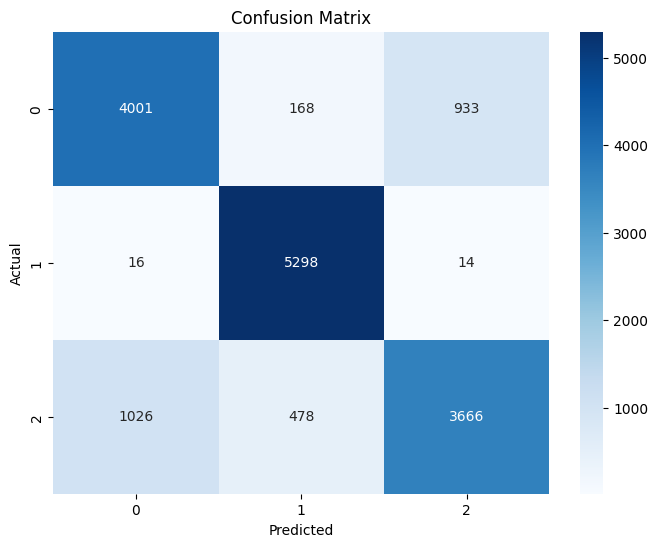

In [5]:

# 評価レポート
print("Classification Report:\n", classification_report(y_test, y_pred))

# 混同行列の可視化
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


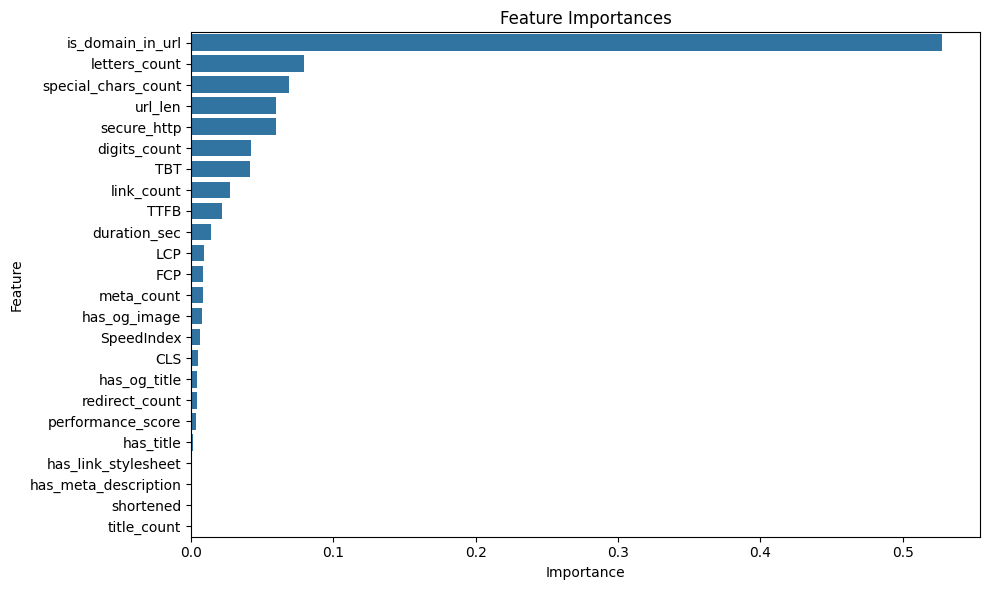

In [6]:

# 特徴量の重要度表示
importances = model.feature_importances_
features = X.columns

# 可視化
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()
